In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
from pandas import DataFrame,Series

In [9]:
import sklearn

In [10]:
from sklearn.datasets import load_iris

In [11]:
iris=load_iris()

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
iris_data=DataFrame(iris.data,columns=['sepal length','sepal width','petal length','petal width'])

In [14]:
iris_target=DataFrame(iris.target,columns=['Species'])

In [16]:
X=iris_data

In [24]:
X.shape

(150, 4)

In [17]:
Y=iris_target

In [26]:
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [28]:
Y=np.ravel(Y)

In [29]:
Y.shape

(150,)

In [18]:
import sklearn.svm

In [19]:
from sklearn.svm import SVC

In [22]:
svc=SVC(gamma='auto')

In [31]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
svc.score(X,Y)

0.9866666666666667

In [98]:
Y1=iris_target

In [34]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [102]:
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
y=svc.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(Y_test,y)

0.9736842105263158

# SVM 4 methods

In [319]:
X=iris_data.iloc[:,:2]

In [326]:
X.shape

(150, 2)

In [152]:
Y=iris_target

In [158]:
Y.shape

(150, 1)

In [320]:
Y=np.ravel(Y)

In [321]:
Y.shape

(150,)

In [324]:
svc_lin=SVC(kernel='linear')

In [162]:
svc_lin.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [163]:
rbf_svm=SVC(kernel='rbf',gamma=0.7)

In [164]:
rbf_svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [165]:
poly_svm=SVC(kernel='poly',degree=3,gamma=0.7)

In [166]:
poly_svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [167]:
from sklearn.svm import LinearSVC

In [168]:
lin_svm=LinearSVC()

In [169]:
lin_svm.fit(X,Y)

C:\Users\k.divakar.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [290]:
h=0.02
x_min=X.iloc[:,0].min()-1#X[:].min()[0]-1
x_max=X.iloc[:,0].max()+1#X[:].max()[0]+1
y_min=X.iloc[:,1].min()-1#X[:].min()[1]-1
y_max=X.iloc[:,1].max()+1#X[:].max()[1]+1

In [171]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [172]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

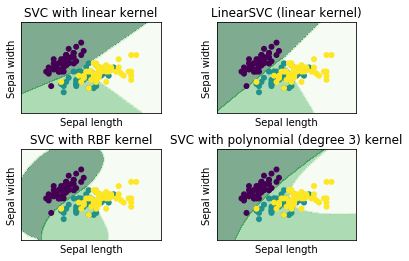

In [314]:
for i,clf in enumerate((lin_svm,svc_lin,rbf_svm,poly_svm)):
   # plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Greens_r, alpha=0.5)
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y,linewidths=0)
    plt.title(titles[i])
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

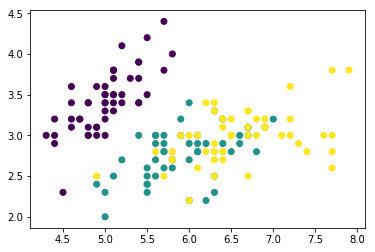

In [299]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y)

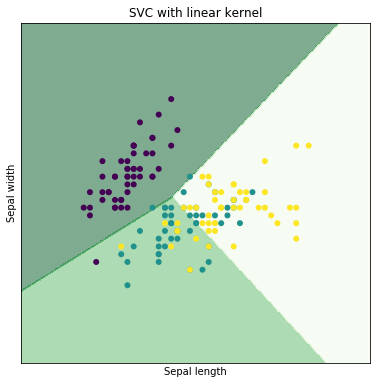

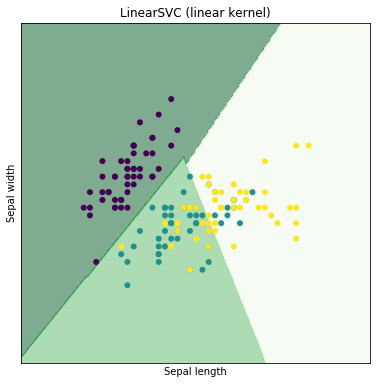

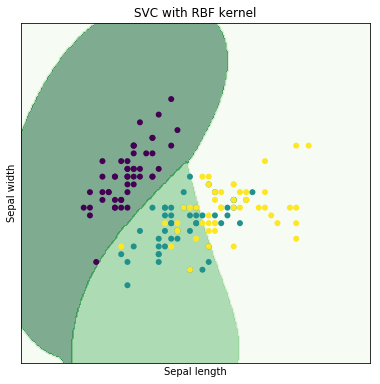

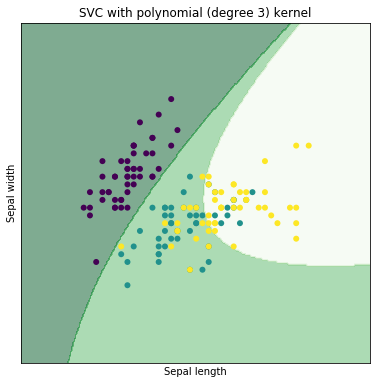

In [315]:
for i,clf in enumerate((lin_svm,svc_lin,rbf_svm,poly_svm)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Greens_r, alpha=0.5)
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y,linewidths=0)
    plt.title(titles[i])
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

In [377]:
X1=iris_data.iloc[:,2:]

In [378]:
Y1=iris_target

In [379]:
X1.shape

(150, 2)

In [380]:
Y1.shape

(150, 1)

In [381]:
Y1=np.ravel(Y1)

In [382]:
Y1.shape

(150,)

In [383]:
svc_lin1=SVC(kernel='linear').fit(X1,Y1)
poly_svm1=SVC(kernel='poly',gamma=0.7,degree=3).fit(X1,Y1)
rbf_svm1=SVC(kernel='rbf',gamma=0.7).fit(X1,Y1)
lin_svm1=LinearSVC(max_iter=5000).fit(X1,Y1)

In [384]:
h=0.02
x1_min=X1.iloc[:,0].min()-1
x1_max=X1.iloc[:,0].max()+1
y1_min=X1.iloc[:,1].min()-1
y1_max=X1.iloc[:,1].max()+1

In [385]:
xx1,yy1=np.meshgrid(np.arange(x1_min,x1_max,h),np.arange(y1_min,y1_max,h))

In [386]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

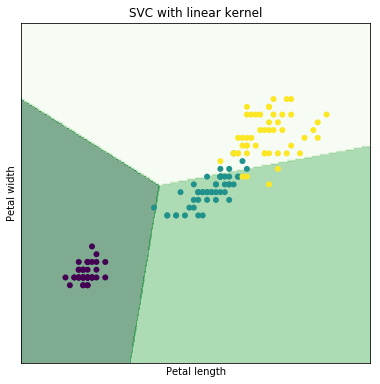

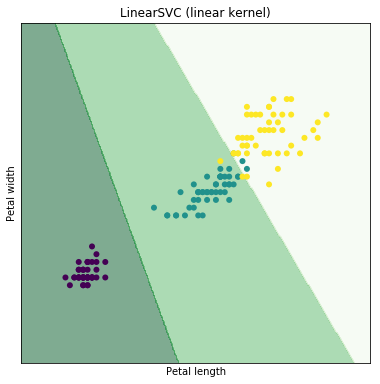

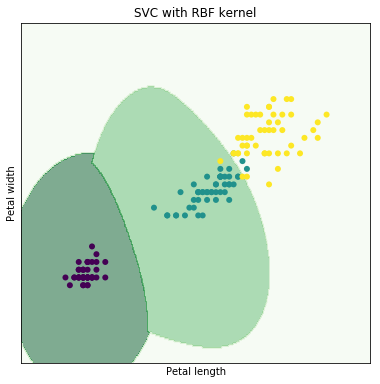

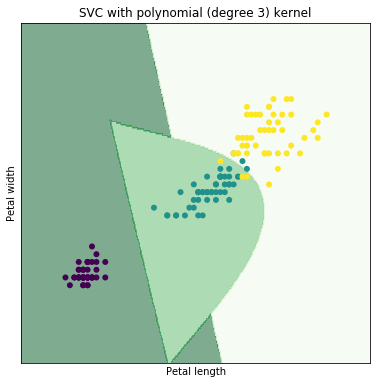

In [392]:
for i,clf in enumerate((lin_svm1,svc_lin1,rbf_svm1,poly_svm1)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    z1=clf.predict(np.c_[xx1.ravel(),yy1.ravel()])
    z1=z1.reshape(xx1.shape)
    plt.contourf(xx1,yy1,z1,cmap=plt.cm.Greens_r, alpha=0.5)
    plt.scatter(X1.iloc[:,0],X1.iloc[:,1],c=Y,linewidths=0)
    plt.title(titles[i])
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(yy1.min(),yy1.max())